# TASK-1 PREDICTION USING UNSUPERVISED ML (K-means clustering) 
##  - by Vikram Krishna

From the given 'Iris' Dataset, Predict the optimum number of clusters and represent it visually.

Data is available at the URL: https://bit.ly/3kXTdox

### STEP-1 import all required python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### STEP-2 Load the dataset

In [2]:
iris = pd.read_csv('Iris.csv')
iris.set_index('Id',inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### STEP-2 Data preprocessing


### Checking missing values

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


We can see there are no null values 1.e, no missing data

### Checking inconsistent data

In [4]:
iris.shape

(150, 5)

In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

 No inconsistent data is found

## Analyzing the data

Before performing the clustering, Lets analyze the data by ploting ascatter plot.

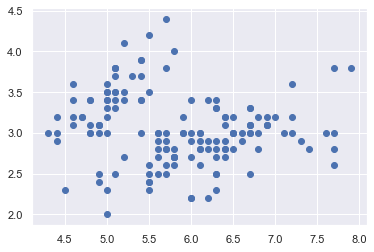

In [6]:
#Visualizing the data - On the first two columns
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'])
plt.show()

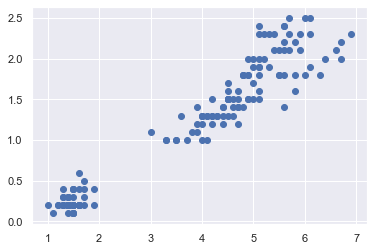

In [7]:
#Visualizing the data - On the last two columns
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'])
plt.show()

We can Observe 2 clusters as of now in both plots

### STEP-3 Selecting features to perform K-MEANS CLUSTERING

### 1) To perform clustering based on numerical data

In [8]:
x = iris.iloc[: , 0:2]
y = iris.iloc[: , 2:4]
z = iris.iloc[: , 0:4]

In [9]:
x

,SepalLengthCm,SepalWidthCm
Id,,
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6
...,...,...
146,6.7,3.0
147,6.3,2.5
148,6.5,3.0


In [10]:
y

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0


In [11]:
z

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


## To perform Clustering based on Categorical Data 

In [12]:
iris_cut = iris.copy()
iris_cut['Species'] = iris_cut['Species'].map({'Iris-versicolor' : 0, 'Iris-setosa' : 1, 'Iris-virginica' : 2})
iris_cut

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [13]:
a = iris_cut.iloc[:, 4:]
a

,Species
Id,
1,1
2,1
3,1
4,1
5,1
...,...
146,2
147,2
148,2


## 3) To perform clustering based on both numerical && categorical data

In [14]:
b = iris_cut.iloc[:, 2:]
b

,PetalLengthCm,PetalWidthCm,Species
Id,,,
1,1.4,0.2,1
2,1.4,0.2,1
3,1.3,0.2,1
4,1.5,0.2,1
5,1.4,0.2,1
...,...,...,...
146,5.2,2.3,2
147,5.0,1.9,2
148,5.2,2.0,2


From the above created variables (x,y,z,a,b), we can select any one of the based on our requirements where

x has the features to perform clustering based on "SepalLengthCm and SepalWidthCm" (numerical data)

y has the features to perform clustering based on "PetalLengthCm and PetalWidthCm" (numerical data)

z has the features to perform clustering based on SepalLengthCm,SepalWidthCm,petalLengthCm and petalWidthCm (numerical data)

a has the features to perform clustering based on Species(single feature and categorical data)

b has the features to perform clustering based on "PetalLengthCm,PetalWidthCm and Species" (both numerical and categorical data)

### STEP-4 PERFORM CLUSTERING

In Kmeans(n), "n" is the number of clusters required.

In [15]:
kmeans = KMeans(2)

In [16]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [17]:
Identified_clusters = kmeans.fit_predict(x)
Identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [18]:
iris_with_clusters = iris.copy()
iris_with_clusters['cluster'] = Identified_clusters
iris_with_clusters

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0
147,6.3,2.5,5.0,1.9,Iris-virginica,0
148,6.5,3.0,5.2,2.0,Iris-virginica,0


## Visualizing results

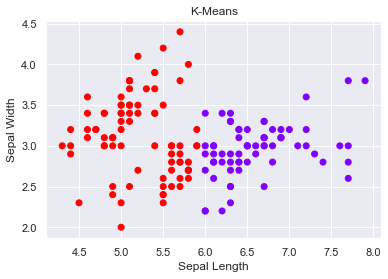

In [19]:
#Visualizing the clusters
plt.scatter(iris_with_clusters['SepalLengthCm'], iris_with_clusters['SepalWidthCm'],c=iris_with_clusters['cluster'],cmap = 'rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means')

plt.show()

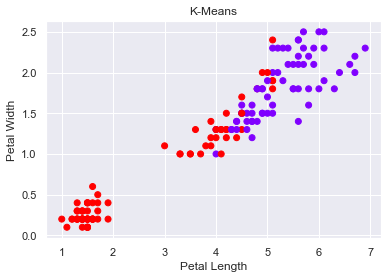

In [20]:
plt.scatter(iris_with_clusters['PetalLengthCm'], iris_with_clusters['PetalWidthCm'],c=iris_with_clusters['cluster'],cmap = 'rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means')

plt.show()

This solution of 2 clusters might not look satisfactory, So in order to find out optimum number of clusters we can use THE ELBOW METHOD

### STEP-5 THE Elbow method(Choosing Number of clusters)

Ploting graph between WCSS(Within-cluster sum of squares) against Number of clusters, We can choose the optimun number of clusters

### Calculating WCSS

In [21]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss 

[130.18093333333334,
 57.982406042078765,
 37.12370212765957,
 27.962171178088646,
 20.98263639501571,
 17.20830189701897,
 14.628929179122284,
 12.905011214630782,
 11.180438311688313]


We can observe that the values are decreasing gradually. In order to get clear picture lets plot these against number of clusters

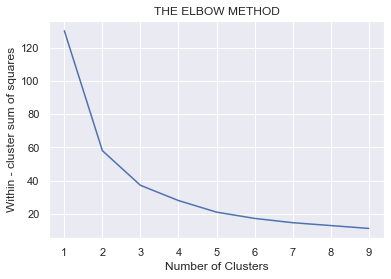

In [22]:
plt.plot(range(1,10),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('Within - cluster sum of squares')
plt.show()

From the above graph, we can observe almost 4 clear elbow tips at 2,3,4 and 5. This shows that after 5, the solution might not be a optimal one.

### Exploring different clustering solutions and selecting optimum number of clusters

In [23]:
kmeans_fin = KMeans(3)
kmeans_fin.fit(x)
clusters_new = x.copy()
clusters_new['cluster_predicted'] = kmeans_fin.predict(x)

In [24]:
clusters_new

,SepalLengthCm,SepalWidthCm,cluster_predicted
Id,,,
1,5.1,3.5,2
2,4.9,3.0,2
3,4.7,3.2,2
4,4.6,3.1,2
5,5.0,3.6,2
...,...,...,...
146,6.7,3.0,0
147,6.3,2.5,1
148,6.5,3.0,0


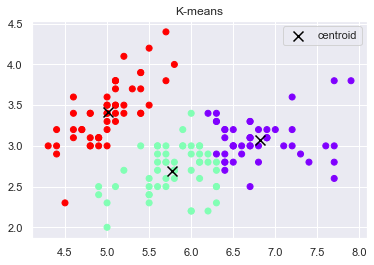

In [25]:
plt.scatter(clusters_new['SepalLengthCm'],clusters_new['SepalWidthCm'],c=clusters_new['cluster_predicted'],cmap='rainbow' )
plt.title('K-means')

#plotting centroids
plt.scatter(kmeans_fin.cluster_centers_[:, 0], kmeans_fin.cluster_centers_[:, 1], marker='x', s=100,c='black', label='centroid')

plt.legend()
plt.show()

After exploring different solutions, For selected input features "SepalLengthCM && SepalWidthCm" I found 3-cluster solution as optimal.

With our well parameterized code we can play by using different inputs (such as selecting different features,trying different number of clusters) and analyze our data in different aspects

END OF TASK